In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Read the excel file to get the online retail data
retail_dataset = pd.read_excel("Online Retail.xlsx")

# 1. Perform a preliminary data inspection and Data cleaning

In [3]:
# Check the first 5 records
print(retail_dataset.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
# Check the number of rows: 541909 and features: 8
retail_dataset.shape

(541909, 8)

In [5]:
#Get column name and type
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Check the aggregations - 
# as seen, the mean quantity of items ordered is 9 which is good for business 
# and the max quantity ordered is 80995
retail_dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
''' Check for null values
Col Description has 1454 null values
Col CustomerID has 135080 null values
'''
retail_dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# 1.b > Remove duplicate data records

In [8]:
# Dropping any duplicate vaues
retail_dataset.drop_duplicates(inplace=True)

# 1. a > Check for missing data 

In [9]:
# Drop all CustomerID null values as this field is the primary key
retail_dataset.dropna(subset=['CustomerID'], inplace=True)

In [10]:
# Check for null values - no null 
retail_dataset.isnull().sum().sum()

0

In [11]:
# Changing Customer ID type to int to avoid decimal
retail_dataset['CustomerID'] = retail_dataset['CustomerID'].astype(int)

In [12]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [13]:
# Checking the count of unique values in each column
for col in retail_dataset.columns:
    print("Number of unique values in {0} : {1} ".format(col, retail_dataset[col].nunique()))

Number of unique values in InvoiceNo : 22190 
Number of unique values in StockCode : 3684 
Number of unique values in Description : 3896 
Number of unique values in Quantity : 436 
Number of unique values in InvoiceDate : 20460 
Number of unique values in UnitPrice : 620 
Number of unique values in CustomerID : 4372 
Number of unique values in Country : 37 


In [14]:
# Removing cancelled orders as we want to focus on shopped items only
cancelled_orders_df = retail_dataset[retail_dataset['InvoiceNo'].str.startswith('C', na=False)]
retail_dataset = retail_dataset[~retail_dataset['InvoiceNo'].str.startswith('C', na=False)]
retail_dataset.head()
cancelled_orders_df.reset_index()
retail_dataset.reset_index()

# Calculating the total amount of items returned
cancelled_orders_df['TotalAmount'] = cancelled_orders_df['UnitPrice']*cancelled_orders_df['Quantity']
print("Total cancelled order amount: £", cancelled_orders_df['TotalAmount'].sum())

# As there are no cancelled/returned items we can calculate total amount
retail_dataset['TotalAmount'] = retail_dataset['UnitPrice']*retail_dataset['Quantity']
retail_dataset.head()

Total cancelled order amount: £ -608689.47


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


<AxesSubplot:>

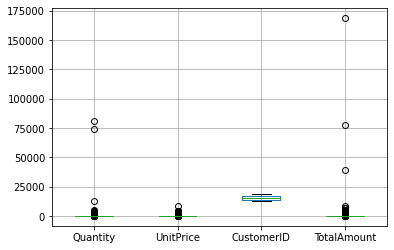

In [15]:
# Checking for outliers
retail_dataset.boxplot()

In [16]:
# Removing outliers as KMeans is sensitive to outliers
print(retail_dataset[retail_dataset['Quantity']>20000])
retail_dataset = retail_dataset[retail_dataset['Quantity'] < 20000]

       InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  
61619  2011-01-18 10:01:00       1.04       12346  United Kingdom      77183.6  
540421 2011-12-09 09:15:00       2.08       16446  United Kingdom     168469.6  


# 2.a > Create month cohorts and analyse active  customers for each cohort

In [17]:
# Function to extract month and year from date
def extractMonth(date):
    return dt.datetime(date.year, date.month, 1)

# creating a new column to save the month and year
retail_dataset['InvoiceDate_Month'] = retail_dataset['InvoiceDate'].apply(extractMonth)
retail_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceDate_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


Number of customers shopped by month::
12 . 2010  ::  885
1 . 2011  ::  740
2 . 2011  ::  758
3 . 2011  ::  974
4 . 2011  ::  856
5 . 2011  ::  1056
6 . 2011  ::  991
7 . 2011  ::  949
8 . 2011  ::  935
9 . 2011  ::  1266
10 . 2011  ::  1364
11 . 2011  ::  1665
12 . 2011  ::  614


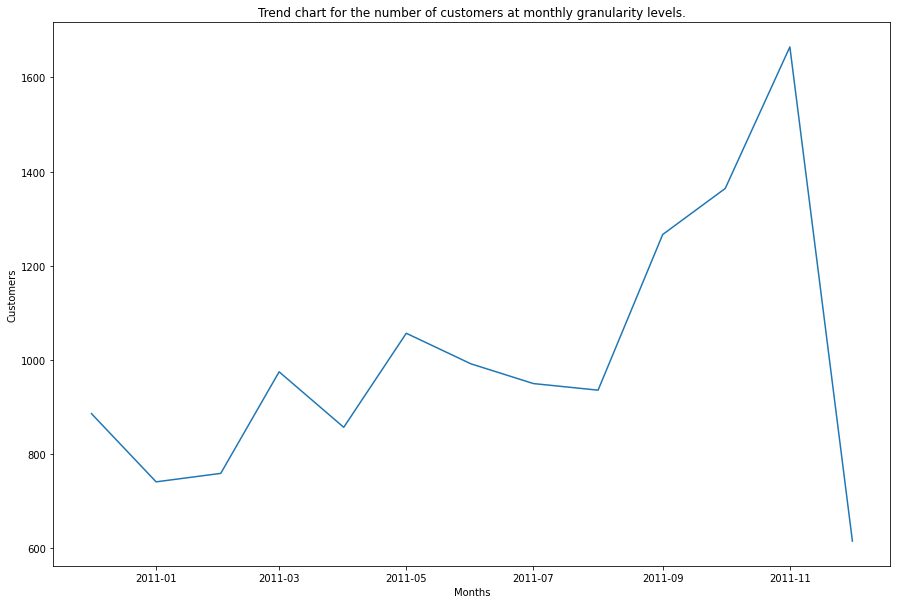

In [18]:
# Grouping according to Month
monthly_frequency = retail_dataset.groupby(['InvoiceDate_Month'])

index = monthly_frequency.size().index
cust_list = []

print('Number of customers shopped by month::')
for i in index:
    f = monthly_frequency.get_group(i)['CustomerID'].nunique()
    cust_list.append(f)
    print(i.month, '.', i.year, ' :: ', f)
    
plt.rcParams["figure.figsize"] = [15,10] 
plt.title("Trend chart for the number of customers at monthly granularity levels.")
plt.xlabel("Months")
plt.ylabel("Customers")
plt.plot(index, cust_list)

# Insight: From the analysis, we see that November, 2011 
# is the month where most customers shopped 
# with 1665 being total number of customers


# 2.b > Also Analyse the retention rate of customers

In [19]:
# Group by unique customers
customer_groupby = retail_dataset.groupby('CustomerID')

# Get how many months each customer shopped
# 12 meaning customer shopped all 12 months - hence more loyal 
# Hence, business would know who the loyal customers are
cust_freq = customer_groupby['InvoiceDate_Month']
print(cust_freq.nunique())

# Find out when each customer first shopped at site
retail_dataset['FirstShopped'] = cust_freq.transform('min')


CustomerID
12347     7
12348     4
12349     1
12350     1
12352     4
         ..
18280     1
18281     1
18282     2
18283    10
18287     2
Name: InvoiceDate_Month, Length: 4338, dtype: int64


In [20]:
# Find the time in months since first a customer shopped to find retention
year = retail_dataset['InvoiceDate_Month'].dt.year - retail_dataset['FirstShopped'].dt.year
month = retail_dataset['InvoiceDate_Month'].dt.month - retail_dataset['FirstShopped'].dt.month
retail_dataset['MonthDiff'] = year*12 + month + 1

In [21]:

grouping = retail_dataset.groupby(['FirstShopped', 'MonthDiff'])

# Count the number of unique values per Customer ID
cohort_data = grouping['CustomerID'].nunique().reset_index()
#print(cohort_data)

# Create a pivot
cohort_counts = cohort_data.pivot(index='FirstShopped', columns='MonthDiff', values='CustomerID')
#print(cohort_counts)

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]
#print(cohort_sizes)

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100
print(retention)


MonthDiff        1          2          3          4          5          6   \
FirstShopped                                                                 
2010-12-01    100.0  36.610169  32.316384  38.418079  36.271186  39.774011   
2011-01-01    100.0  22.115385  26.682692  23.076923  32.211538  28.846154   
2011-02-01    100.0  18.684211  18.684211  28.421053  27.105263  24.736842   
2011-03-01    100.0  15.044248  25.221239  19.911504  22.345133  16.814159   
2011-04-01    100.0  21.333333  20.333333  21.000000  19.666667  22.666667   
2011-05-01    100.0  19.014085  17.253521  17.253521  20.774648  23.239437   
2011-06-01    100.0  17.355372  15.702479  26.446281  23.140496  33.471074   
2011-07-01    100.0  18.085106  20.744681  22.340426  27.127660  11.170213   
2011-08-01    100.0  20.710059  24.852071  24.260355  12.426036        NaN   
2011-09-01    100.0  23.411371  30.100334  11.371237        NaN        NaN   
2011-10-01    100.0  24.022346  11.452514        NaN        NaN 

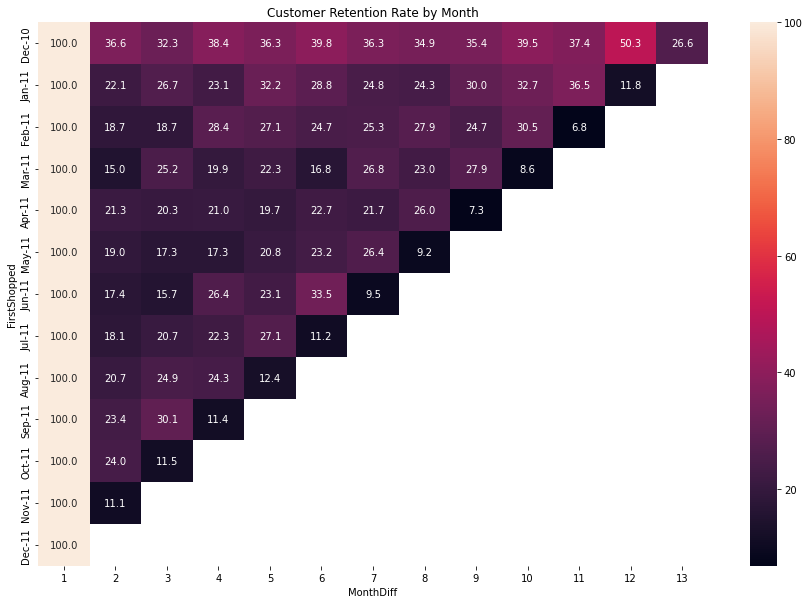

In [22]:

def get_month_name(x):
   return x.strftime('%b-%y')

month_list = retention.reset_index()['FirstShopped']
month_list = month_list.apply(get_month_name)

plt.title('Customer Retention Rate by Month')
sns.heatmap(data=retention,
            annot = True,
            fmt = '.1f',
           yticklabels=month_list)
plt.show();

In [23]:
# We see that the retention rates plunges after 1 month. 
# Of the people that became customers in December 2010, only 36.6% makes another purchase the next month.
# After this initial plunge, this number remains steady.


# 3. Build a RFM model 

# 3.a.i> Recency - the last order of a customer

In [24]:
# First, find the most recent order
last_order = retail_dataset['InvoiceDate'].max()

# For each customer, find the most recent date they shopped in the site
recency = retail_dataset.groupby(['CustomerID'])['InvoiceDate'].max()
recency = recency.rename("LastShopped")
rfm_df = pd.DataFrame(recency)

print("The last customer to order: \n", rfm_df[rfm_df['LastShopped'] == last_order])

rfm_df['Recency'] = (last_order - rfm_df['LastShopped']).dt.days
rfm_df.pop('LastShopped')
rfm_df.head()

The last customer to order: 
                    LastShopped
CustomerID                    
12680      2011-12-09 12:50:00


,Recency
CustomerID,
12347,1
12348,74
12349,18
12350,309
12352,35


<AxesSubplot:ylabel='Frequency'>

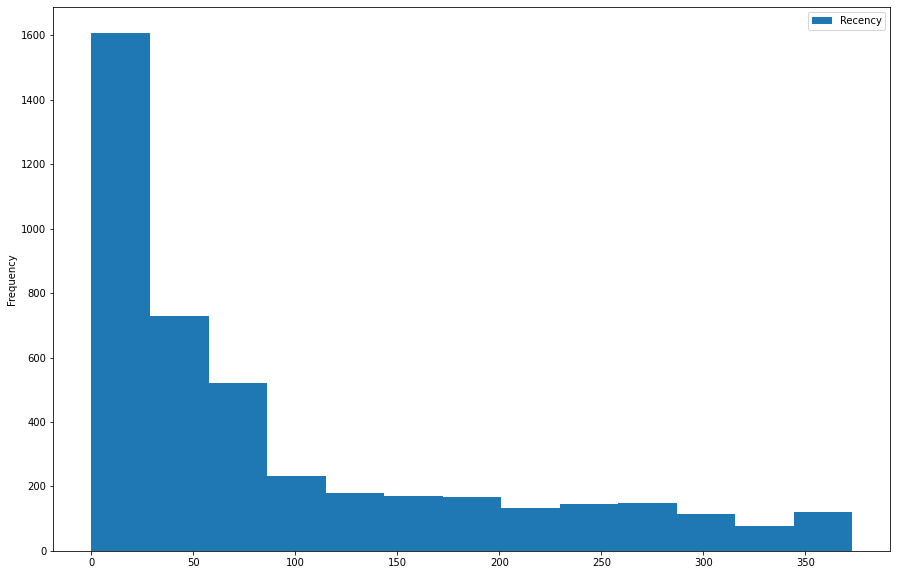

In [25]:
rfm_df.plot.hist(bins=13)

# Distribution is right skewed indicating that number of customers decreased 
# the first few months before becoming stable
# Business needs to work on Customer retention

# 3. a. ii > Frequency as  count of purchases done 

In [26]:
# Find frequency of customers - how many times a customer purchased items from the shop
frequency = customer_groupby['InvoiceNo'].nunique()
frequency = frequency.rename('Frequency')
rfm_df = rfm_df.merge(frequency, on='CustomerID')
rfm_df.head()

,Recency,Frequency
CustomerID,,
12347,1,7
12348,74,4
12349,18,1
12350,309,1
12352,35,8


<AxesSubplot:title={'center':'Frequency'}, xlabel='CustomerID'>

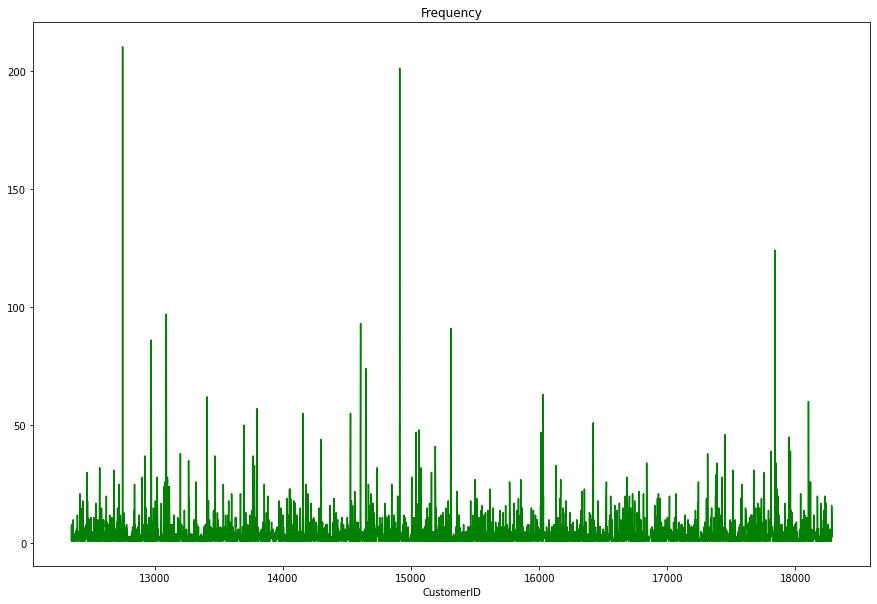

In [27]:
rfm_df['Frequency'].plot(kind='line', title='Frequency', color='green')

In [28]:
print("Customer who shopped the most: ")
print(rfm_df[rfm_df['Frequency'] == rfm_df['Frequency'].max()])
# The most loyal customer data is found who is also the last customer to shop

Customer who shopped the most: 
            Recency  Frequency
CustomerID                    
12748             0        210


In [29]:
rfm_df.groupby('Frequency').size()

Frequency
1      1494
2       834
3       508
4       387
5       243
6       172
7       143
8        98
9        68
10       54
11       52
12       45
13       30
14       20
15       28
16       11
17       18
18       14
19       12
20       12
21       11
22        5
23        5
24        3
25        8
26        7
27        3
28        6
29        1
30        4
31        3
32        3
33        2
34        3
35        1
37        3
38        2
39        2
41        1
44        1
45        1
46        1
47        2
48        1
50        1
51        1
55        2
57        1
60        1
62        1
63        1
74        1
86        1
91        1
93        1
97        1
124       1
201       1
210       1
dtype: int64

In [30]:
rfm_df.describe()

# By looking at the Frequency data we infer that customers have shopped 4 times on an average
# Only 2 customers shopped more than 200 times
# 1494 customers have shopped just once in the year


,Recency,Frequency
count,4338.000000,4338.000000
mean,91.511757,4.272476
std,99.963616,7.706304
min,0.000000,1.000000
25%,17.000000,1.000000
50%,50.000000,2.000000
75%,141.000000,5.000000
max,373.000000,210.000000


# 3.a.iii > Monetary value  as total amount spend.

In [31]:
# Calculate the total amount spent by each customer
monetary = customer_groupby['TotalAmount'].sum()
monetary = monetary.rename('Monetary')
rfm_df = rfm_df.merge(monetary, on='CustomerID')
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
12352,35,8,2506.04
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,178.05


In [32]:
print("Customer who spent the most money: ")
print(rfm_df[rfm_df['Monetary'] == rfm_df['Monetary'].max()])

Customer who spent the most money: 
            Recency  Frequency   Monetary
CustomerID                               
14646             1         74  280206.02


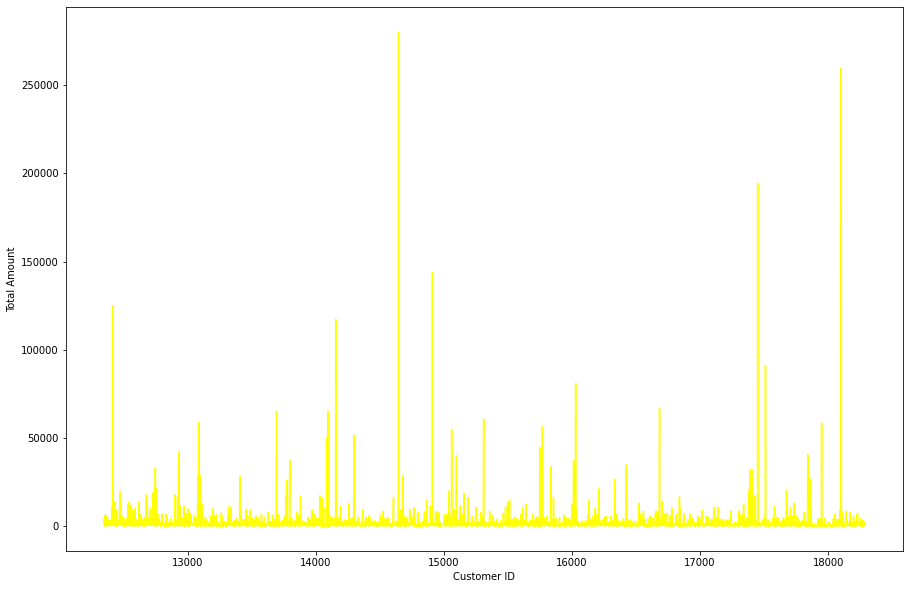

In [33]:
ax = rfm_df['Monetary'].plot(xlabel='Customer ID', ylabel='Total Amount', color='yellow')

In [34]:
print(rfm_df.describe())

# The maximum money spent is $280206 by Customer ID 14646 
# while lowest is 0.00 spent by Customer iD 13256 - which needs to be checked as unit price cannot be 0.0

print(rfm_df[rfm_df.Monetary > rfm_df.Monetary.mean()].count())

# Only 896 customers out of 4339 customers shopped more than the average amount 


           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     91.511757     4.272476    1992.059865
std      99.963616     7.706304    8546.651533
min       0.000000     1.000000       0.000000
25%      17.000000     1.000000     306.210000
50%      50.000000     2.000000     668.040000
75%     141.000000     5.000000    1656.537500
max     373.000000   210.000000  280206.020000
Recency      896
Frequency    896
Monetary     896
dtype: int64


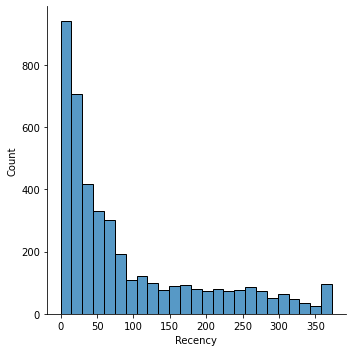

In [35]:
ax = sns.displot(rfm_df['Recency'])

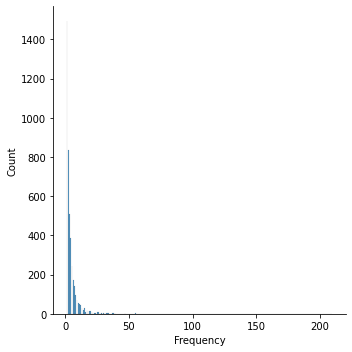

In [36]:
ax = sns.displot(rfm_df['Frequency'])

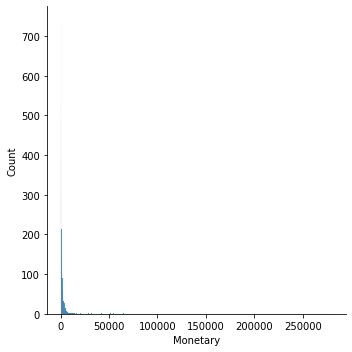

In [37]:
ax = sns.displot(rfm_df['Monetary'])

In [38]:
# The data is positive skewed

# 3.b.i > Calculate RFM Score

In [39]:
# For Recency - Customers with low recency are more valued. 
# eg a customer who shopped 3 days ago is more valued than customer who shopped 200 days ago.
rfm_df['r'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])

In [40]:
# Calculating frequency score
# Frequent customers get higher score
rfm_df['f'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=5, labels=[1,2,3,4,5])

In [41]:
# Calculating Monetary score
# Customers spending more get higher score
rfm_df['m'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1,2,3,4,5])

In [42]:
rfm_df.head()

,Recency,Frequency,Monetary,r,f,m
CustomerID,,,,,,
12347,1,7,4310.00,5,5,5
12348,74,4,1797.24,2,4,4
12349,18,1,1757.55,4,1,4
12350,309,1,334.40,1,1,2
12352,35,8,2506.04,3,5,5


In [43]:
rfm_df.groupby('r', sort = True)['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
r,,,,,,,,
5,884.0,5.324661,3.803173,0.0,2.0,5.0,9.0,13.0
4,888.0,22.218468,5.560938,14.0,17.0,22.0,27.0,32.0
3,858.0,51.315851,11.220990,33.0,42.0,51.0,60.0,71.0
2,843.0,115.249110,32.653433,72.0,85.0,109.0,142.5,178.0
1,865.0,267.464740,57.140859,179.0,217.0,262.0,311.0,373.0


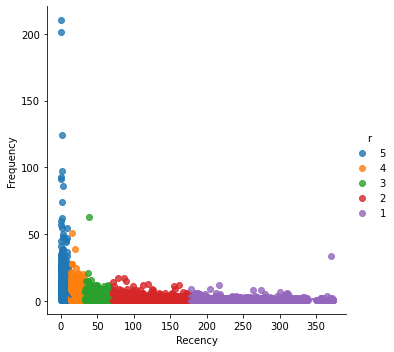

In [44]:
sns.lmplot(data=rfm_df, x='Recency', y='Frequency', hue='r')

In [45]:
rfm_df.groupby('f', sort='True')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
f,,,,,,,,
1,868.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2,867.0,1.277970,0.448257,1.0,1.0,1.0,2.0,2.0
3,868.0,2.316820,0.465505,2.0,2.0,2.0,3.0,3.0
4,867.0,4.020761,0.753457,3.0,3.0,4.0,5.0,6.0
5,868.0,12.743088,14.165919,6.0,7.0,9.0,13.0,210.0


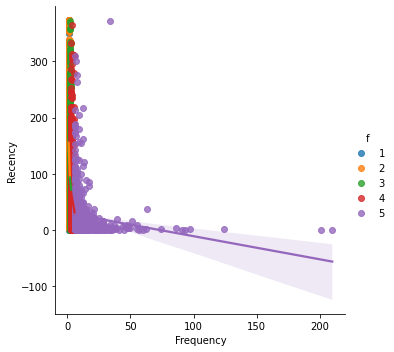

In [46]:
sns.lmplot(data=rfm_df, x='Frequency', y='Recency', hue='f')

In [47]:
rfm_df.groupby('m')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
m,,,,,,,,
1,868.0,152.008594,56.650082,0.00,111.300,155.025,199.2325,248.10
2,867.0,357.009321,64.499740,248.61,306.290,349.270,408.8500,486.72
3,868.0,683.310244,124.195764,486.82,582.475,668.040,780.4700,932.85
4,867.0,1397.023945,317.556946,932.97,1109.935,1345.530,1655.7950,2050.08
5,868.0,7368.377997,18116.323010,2053.02,2632.475,3638.860,5743.8175,280206.02


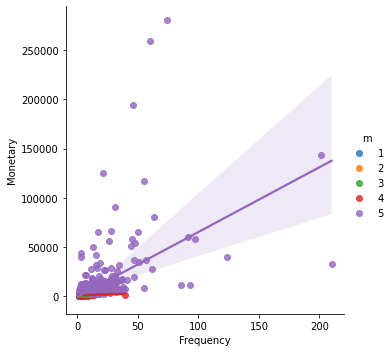

In [48]:
sns.lmplot(data=rfm_df, x='Frequency', y='Monetary', hue='m')

# 3.b.ii > Combine three ratings to get a RFM segment

In [49]:
rfm_df['rfm_segment'] = rfm_df['r'].astype(str)+rfm_df['f'].astype(str)+rfm_df['m'].astype(str)

# 3.b.iii> Get the RFM score by adding up the three ratings

In [50]:
rfm_df['rfm_score'] = rfm_df['r'].astype(int)+rfm_df['f'].astype(int)+rfm_df['m'].astype(int)

In [51]:
rfm_df.head()

,Recency,Frequency,Monetary,r,f,m,rfm_segment,rfm_score
CustomerID,,,,,,,,
12347,1,7,4310.00,5,5,5,555,15
12348,74,4,1797.24,2,4,4,244,10
12349,18,1,1757.55,4,1,4,414,9
12350,309,1,334.40,1,1,2,112,4
12352,35,8,2506.04,3,5,5,355,13


In [52]:
rfm_df.groupby('rfm_score').describe()

# We find the most loyal customers - the hogher the RFM score the more valued the customer is
# This can be used by marketers to advertise and reward their customers

Recency                                                        \
            count        mean         std    min     25%    50%     75%   
rfm_score                                                                 
3           183.0  285.459016   55.118625  179.0  245.50  282.0  327.50   
4           361.0  236.977839   80.573600   72.0  184.00  242.0  294.00   
5           336.0  176.645833  103.941873   33.0   80.00  161.5  262.25   
6           426.0  123.143192   92.868589   14.0   49.00   83.0  187.00   
7           377.0   96.602122   80.547797    0.0   36.00   70.0  146.00   
8           376.0   83.896277   71.587652    0.0   28.00   63.0  122.00   
9           336.0   70.964286   59.841372    0.0   24.75   57.0   96.50   
10          342.0   54.119883   47.155949    0.0   21.00   39.0   77.00   
11          342.0   41.190058   42.624757    0.0   16.00   29.0   56.00   
12          324.0   31.509259   30.781109    0.0   11.00   21.5   42.00   
13          285.0   23.522807   18.249745    0.0    8.00   21.0   37.00   
14          300.0   14.926667    9.310042    0.0    7.00   15.0   22.00   
15          350.0    4.522857    3.668700    0.0    1.00    3.0    8.00   

                 Frequency             ...              Monetary  \
             max     count       mean  ...   75%    max    count   
rfm_score                              ...                         
3          373.0     183.0   1.000000  ...   1.0    1.0    183.0   
4          373.0     361.0   1.013850  ...   1.0    2.0    361.0   
5          373.0     336.0   1.104167  ...   1.0    2.0    336.0   
6          373.0     426.0   1.321596  ...   2.0    3.0    426.0   
7          371.0     377.0   1.588859  ...   2.0    5.0    377.0   
8          313.0     376.0   1.992021  ...   2.0    6.0    376.0   
9          365.0     336.0   2.500000  ...   3.0    7.0    336.0   
10         332.0     342.0   3.038012  ...   4.0    9.0    342.0   
11         371.0     342.0   3.862573  ...   4.0   34.0    342.0   
12         172.0     324.0   4.706790  ...   5.0   17.0    324.0   
13          71.0     285.0   6.526316  ...   7.0   63.0    285.0   
14          32.0     300.0   9.166667  ...  11.0   51.0    300.0   
15          13.0     350.0  18.194286  ...  20.0  210.0    350.0   

                                                                     \
                   mean           std      min        25%       50%   
rfm_score                                                             
3            144.311148     53.007358    30.60   106.8250   141.410   
4            214.610831    114.004276     2.90   123.2400   193.390   
5            288.715119    159.406446     6.20   166.9875   273.465   
6            382.979415    269.237107    20.80   198.0175   313.300   
7            501.546897    403.461266     0.00   264.6200   400.100   
8            664.415455    712.262195    36.56   347.6050   535.925   
9           1077.753068   3268.704744    52.20   467.9825   678.850   
10          1042.642427    889.349289   204.00   587.7875   823.015   
11          1359.189944   1070.228965   201.12   729.4225  1067.930   
12          1780.224784   1296.062410   400.86   981.2100  1381.320   
13          2909.179439   5197.082276   621.68  1387.7900  1906.090   
14          4462.715000   8200.372780   954.42  1934.3650  2738.145   
15         11172.389057  26565.013552  2069.77  3038.0050  4536.815   

                                 
                 75%        max  
rfm_score                        
3           184.2450     239.49  
4           307.9000     486.10  
5           365.7375     922.10  
6           475.5350    1784.71  
7           615.1400    3096.00  
8           731.0200    9864.26  
9          1021.5050   44534.30  
10         1265.6075   11072.67  
11         1735.1675   12601.83  
12         2012.0300   10254.18  
13         2938.9100   80850.84  
14         4605.3525  124914.53  
15         8345.0225  280206.02  

[13 rows x 24 columns]

<AxesSubplot:title={'center':'RFM Score Plot'}, xlabel='RFM Score', ylabel='Count'>

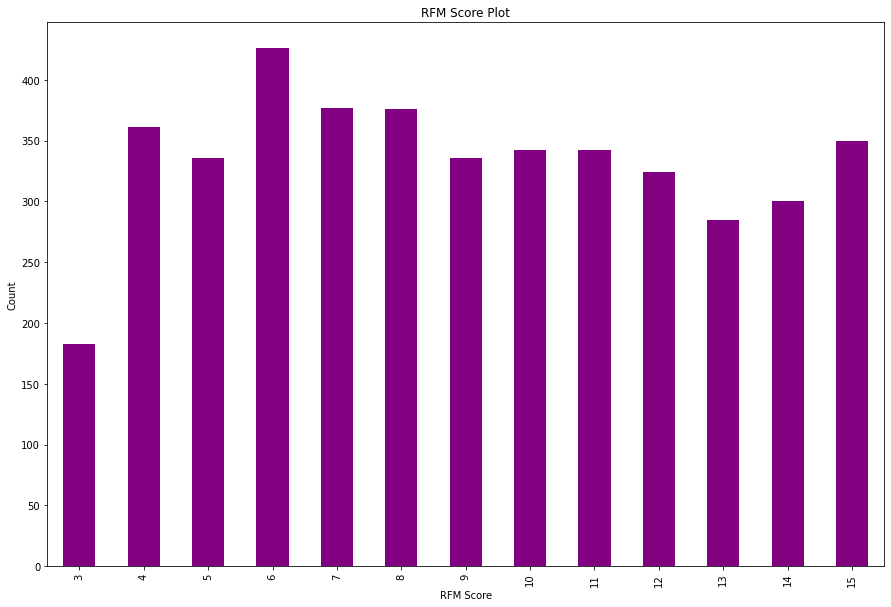

In [53]:
rfm_group = rfm_df.groupby(['rfm_score']).size()
rfm_group.plot.bar(title = 'RFM Score Plot',  xlabel = 'RFM Score', ylabel='Count', color='purple')


# 4 > Create clusters using k means clustering algorithm

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
# Use only appropriate columns
df_transformed = rfm_df.iloc[:,0:3]
df_transformed.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
12352,35,8,2506.04


# 4.a.i > If the data is Un Symmetrically distributed, manage the skewness with appropriate transformation

In [56]:
def handle_skew(df):
    # log transform is one of the possible ways to standardize data
    for feature in df.columns:
        # Transform Skewed Data
        df[feature] = np.log(df[feature]+1)
    return df

# 4.a.ii> Standardize / scale the data

In [57]:
# The process of transforming numerical features to use the same scale 
# is known as feature scaling
def handle_scale(df):
    scaler = StandardScaler()
    for feature in df.columns:
        df[feature] = scaler.fit_transform(df[[feature]])
    return df

In [58]:
# Standardize the data
df_transformed = handle_skew(df_transformed)
df_transformed = handle_scale(df_transformed)
df_transformed.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,-2.148608,1.074332,1.416941
12348,0.383935,0.386315,0.723031
12349,-0.575496,-0.955001,0.705319
12350,1.375533,-0.955001,-0.609645
12352,-0.128933,1.246749,0.986747


# 4.b > Decide the optimum number of clusters to be formed

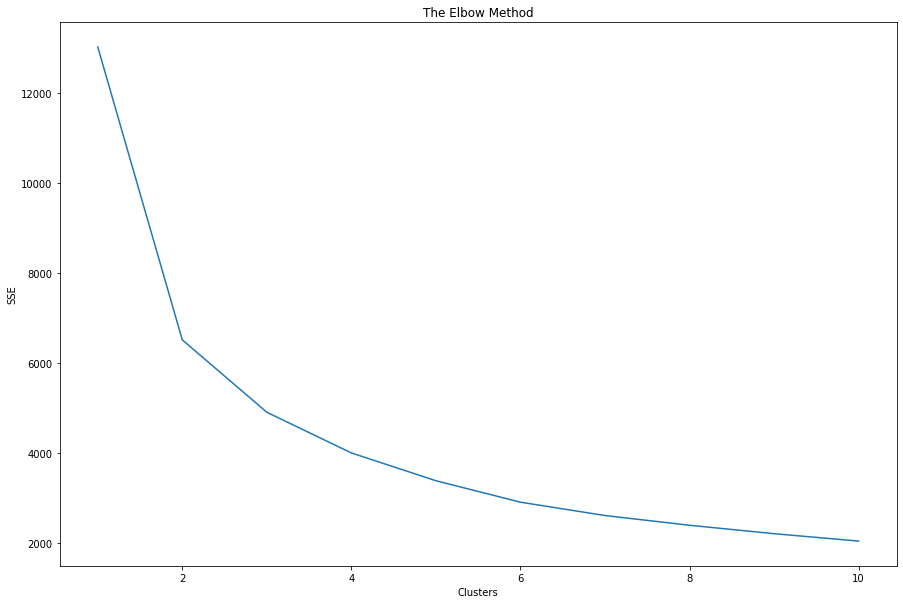

In [59]:
# using elbow method to find optimum number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='random', random_state=0)
    kmeans.fit(df_transformed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

# Looking at the elbow curve, i choose to use 4 clusters

In [60]:
# Creating KMeans clustering with 4 clusters
kmeans_optimum = KMeans(n_clusters = 4, init = 'random',  random_state=0)
y = kmeans_optimum.fit_predict(df_transformed)
print(kmeans_optimum.cluster_centers_)
print(np.unique(kmeans_optimum.labels_, return_counts=True))
df_transformed['kmeans_cluster'] = y

[[-0.82193859 -0.38434497 -0.40429385]
 [ 0.12524142  0.34841848  0.53526434]
 [ 0.86166802 -0.7768491  -0.78982287]
 [-1.29874778  1.67967714  1.40878306]]
(array([0, 1, 2, 3], dtype=int32), array([ 804, 1203, 1639,  692]))


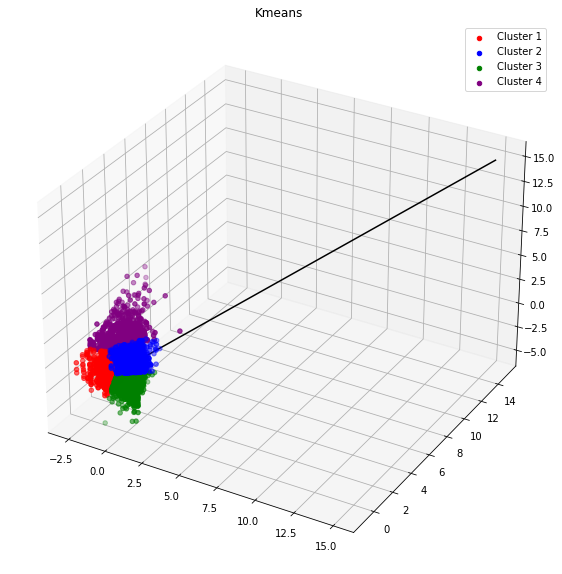

In [61]:
# Plot in 3D
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
data1 = df_transformed[df_transformed.kmeans_cluster==0]
data2 = df_transformed[df_transformed.kmeans_cluster==1]
data3 = df_transformed[df_transformed.kmeans_cluster==2]
data4 = df_transformed[df_transformed.kmeans_cluster==3]

#kplot.scatter3D(rfm_df.Recency, rfm_df.Frequency, rfm_df.Monetary, cmap = my_cmap)
kplot.scatter3D(data1.Recency, data1.Frequency, data1.Monetary, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.Recency, data2.Frequency, data2.Monetary, c='blue', label = 'Cluster 2')
kplot.scatter3D(data3.Recency, data3.Frequency, data3.Monetary, c='green', label = 'Cluster 3')
kplot.scatter3D(data4.Recency, data4.Frequency, data4.Monetary, c='purple', label = 'Cluster 4')

plt.legend()
plt.title("Kmeans")
plt.show()

In [62]:
# Silhouette score - to evaluate the quality of clusters
# higher the score, the better the algorithm.
from sklearn.metrics import silhouette_score
score = silhouette_score(df_transformed,y)
print(score)

0.48290154456386547


In [75]:
# Save data to excel for tableau dashboard
df_elbow = pd.DataFrame(list(zip(range(1,11), wcss)), columns = ['Clusters', 'SSE'])
with pd.ExcelWriter('RFM.xlsx') as writer:
    rfm_df.to_excel(writer, sheet_name='rfm_score')
    df_elbow.to_excel(writer, sheet_name='elbow_method')
    df_transformed.to_excel(writer, sheet_name='rfm_cluster')
